# PURPOSE
* The purpose of this notebook is to create a multiple linear regression model
* The Iris Flower Dataset will be used
* The DVs are: Sepal Length, Sepal Width, Petal Width, and Species
* The IV is Petal Length
* Brandon Johnson

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from feature_engine.encoding import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [30]:
cat_column = ['species']
encoded_species = OneHotEncoder().fit_transform(iris[cat_column])
encoded_species.sample(5)

,species_setosa,species_versicolor,species_virginica
32,1,0,0
5,1,0,0
127,0,0,1
140,0,0,1
83,0,1,0


In [114]:
eda_df = pd.DataFrame(np.column_stack((iris.drop('species',axis=1),encoded_species)), columns=iris.drop('species',axis=1).columns.to_list()+encoded_species.columns.to_list(),dtype=float)
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float64
 1   sepal_width         150 non-null    float64
 2   petal_length        150 non-null    float64
 3   petal_width         150 non-null    float64
 4   species_setosa      150 non-null    float64
 5   species_versicolor  150 non-null    float64
 6   species_virginica   150 non-null    float64
dtypes: float64(7)
memory usage: 8.3 KB


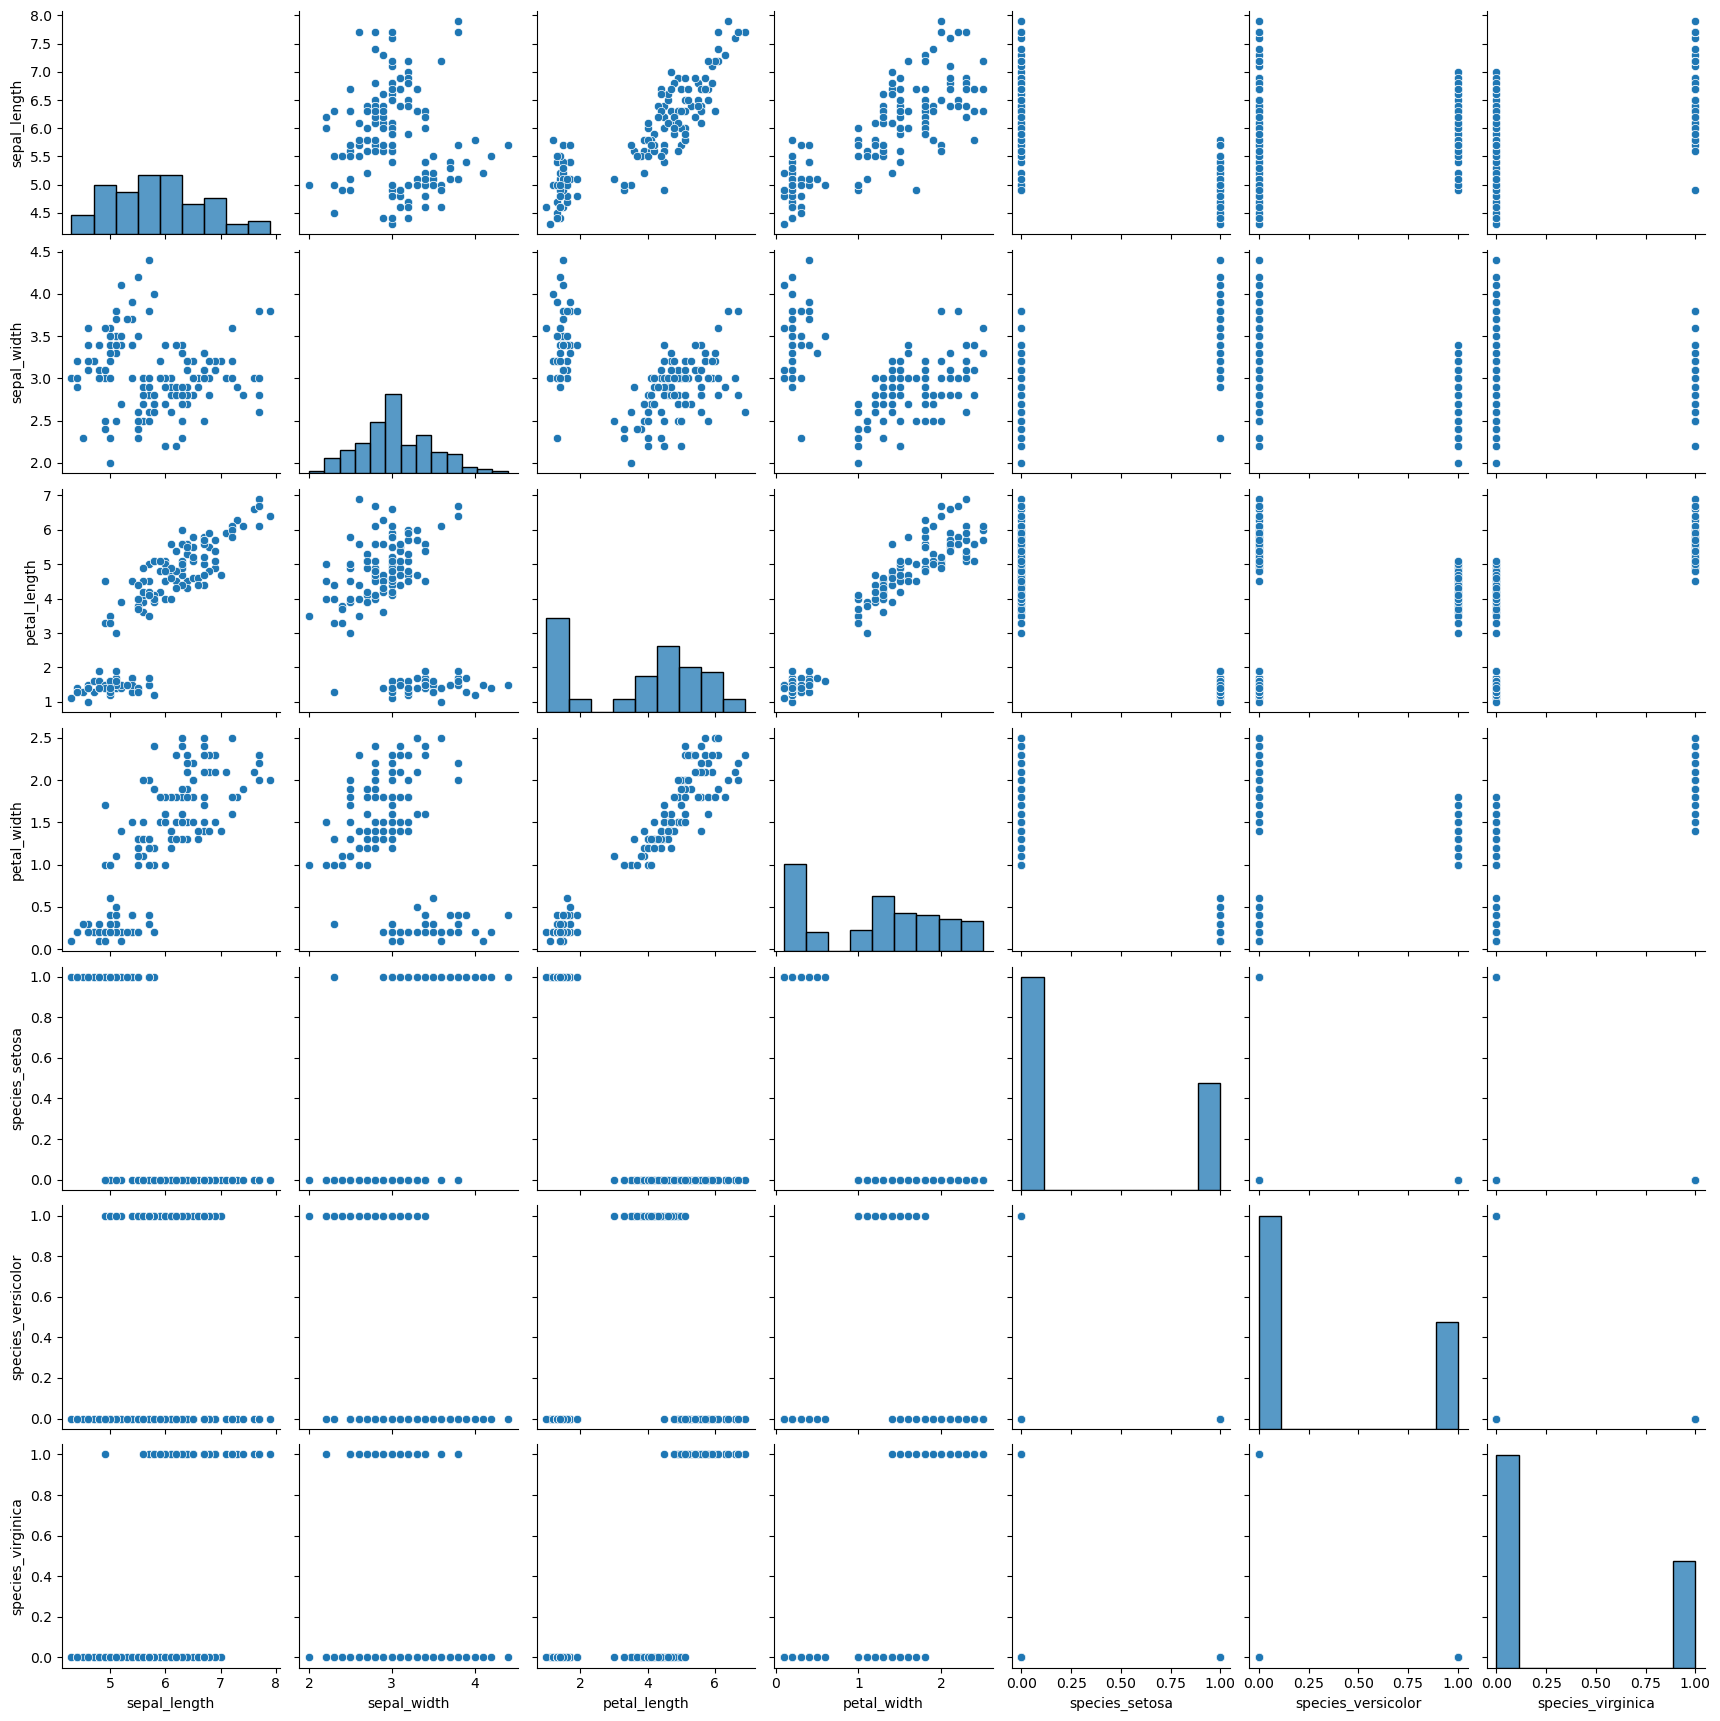

In [115]:
sns.pairplot(eda_df)

### DATA PARTITIONING

In [11]:
y = iris.petal_length
X = eda_df.drop(['petal_length','species','species_virginica'],axis=1)

In [12]:
y.head()

0    1.4
1    1.4
2    1.3
3    1.5
4    1.4
Name: petal_length, dtype: float64

In [13]:
X.head()

,sepal_length,sepal_width,petal_width,species_setosa,species_versicolor
0,5.1,3.5,0.2,1,0
1,4.9,3.0,0.2,1,0
2,4.7,3.2,0.2,1,0
3,4.6,3.1,0.2,1,0
4,5.0,3.6,0.2,1,0


In [18]:
X = X.astype('float32')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal_length        150 non-null    float32
 1   sepal_width         150 non-null    float32
 2   petal_width         150 non-null    float32
 3   species_setosa      150 non-null    float32
 4   species_versicolor  150 non-null    float32
dtypes: float32(5)
memory usage: 3.1 KB


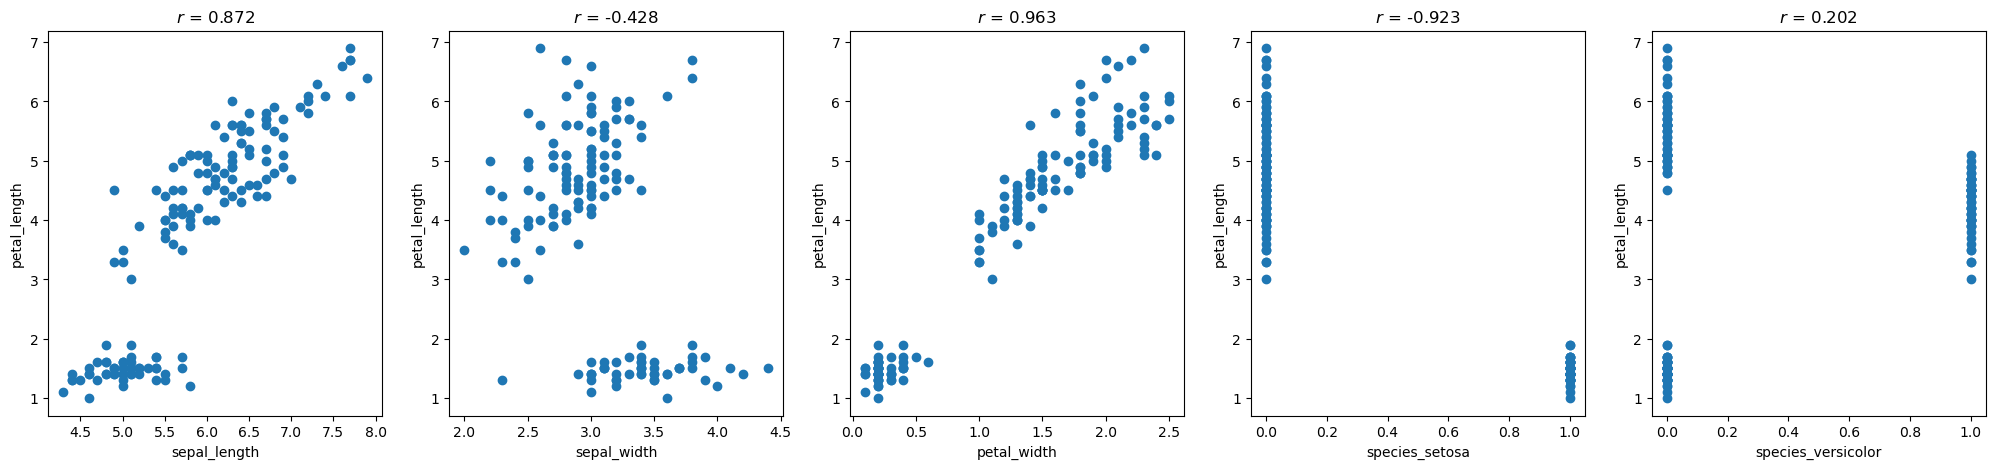

In [48]:
fig,axs = plt.subplots(1,5,figsize=(25,5))

for i,ax in enumerate(axs.flatten()):
    x = X.iloc[:,i]
    corr = np.corrcoef(x.values,y.values)[0,1]
    ax.scatter(x.values,y.values)
    ax.set_title(f'$r$ = {corr:.3f}')
    ax.set_xlabel(x.name)
    ax.set_ylabel(y.name)

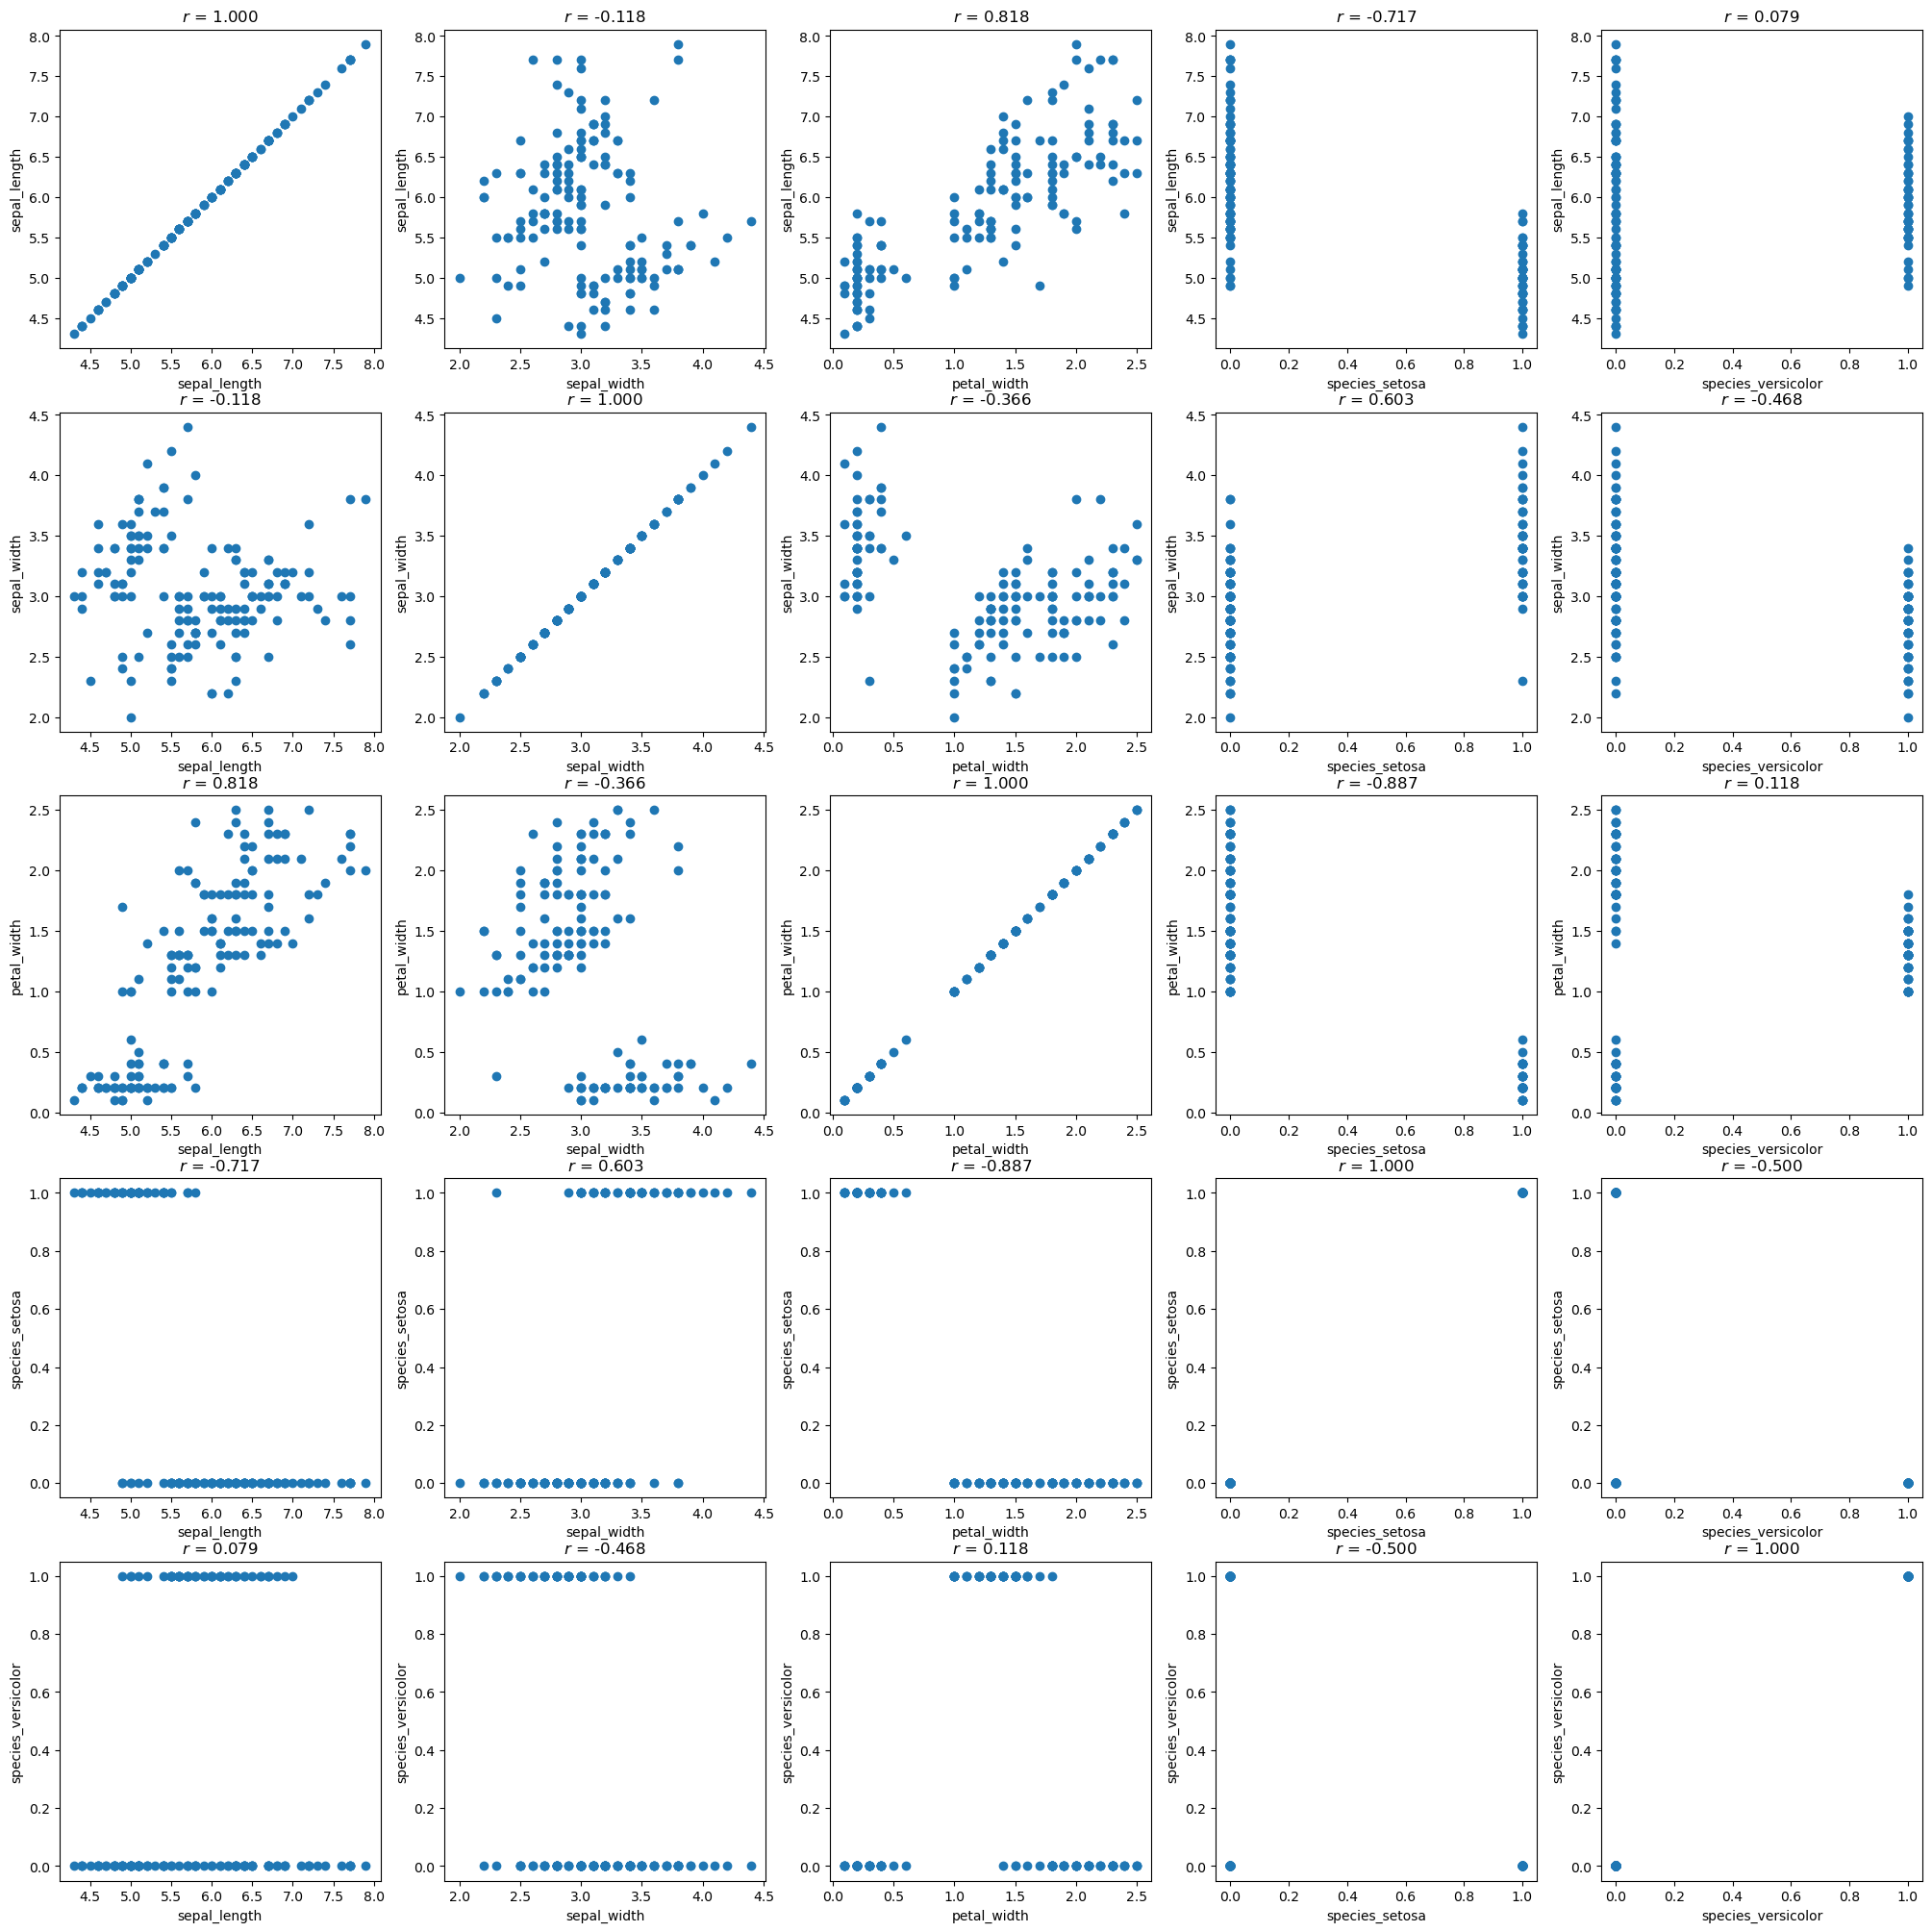

In [53]:
fig, axs = plt.subplots(5,5,figsize=(25,25))

for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        x = X.iloc[:,j]
        y = X.iloc[:,i]
        corr = np.corrcoef(x.values,y.values)[0,1]
        axs[i,j].scatter(x.values,y.values)
        axs[i,j].set_xlabel(x.name)
        axs[i,j].set_ylabel(y.name)
        axs[i,j].set_title(f'$r$ = {corr:.3f}')
plt.show()

In [111]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   sepal_length        150 non-null    object
 1   sepal_width         150 non-null    object
 2   petal_length        150 non-null    object
 3   petal_width         150 non-null    object
 4   species             150 non-null    object
 5   species_setosa      150 non-null    object
 6   species_versicolor  150 non-null    object
 7   species_virginica   150 non-null    object
dtypes: object(8)
memory usage: 9.5+ KB


<AxesSubplot: >

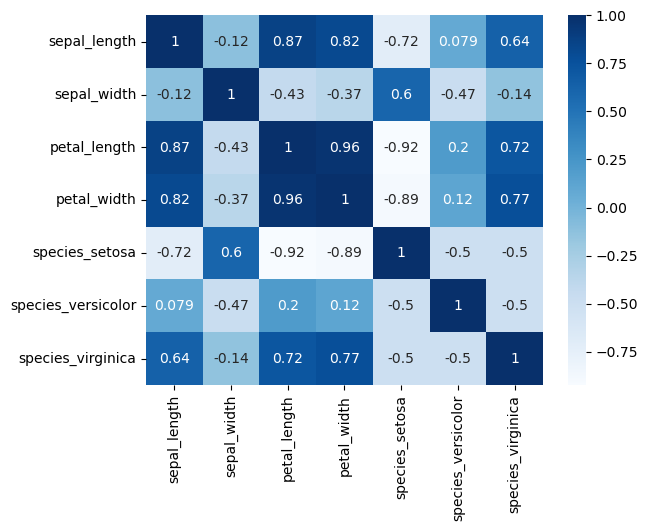

In [117]:
sns.heatmap(eda_df.corr(),cmap='Blues',annot=True)

### MODELING

In [19]:
model = sm.OLS(endog=y,exog=sm.add_constant(X)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1317.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):          2.88e-118
Time:                        10:51:48   Log-Likelihood:                -9.2833
No. Observations:                 150   AIC:                             30.57
Df Residuals:                     144   BIC:                             48.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8632      0.305      2.828      0.005       0.260       1.467
sepal_length           0.6080      0.050     12.101      0.000       0.509       0.707
sepal_width           -0.1805      0.080     -2.246      0.026      -0.339      -0.022
petal_width            0.6022      0.121      4.959      0.000       0.362       0.842
species_setosa        -1.9742      0.245     -8.065      0.000      -2.458      -1.490
species_versicolor    -0.5109      0.095     -5.377      0.000      -0.699      -0.323
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.515
Skew:                          -0.044   Prob(JB):                        0.773
Kurtosis:                       3.273   Cond. No.                         116.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['vif'] = [variance_inflation_factor(exog=X.values,exog_idx=i) for i in range(len(X.columns))]
vif_df

,feature,vif
0,sepal_length,117.934964
1,sepal_width,133.721105
2,petal_width,56.021168
3,species_setosa,30.883688
4,species_versicolor,4.250301


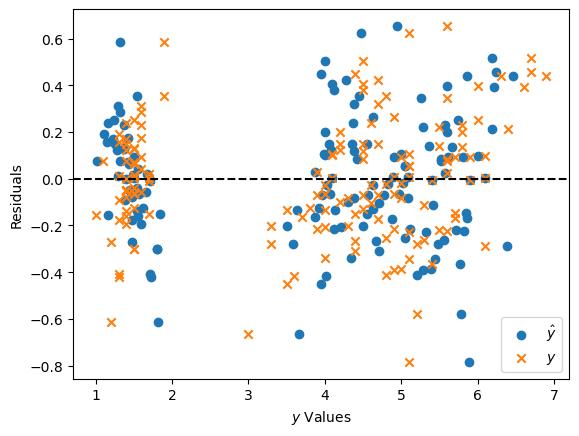

In [37]:
plt.scatter(model.predict(),model.resid,label='$\\hat{y}$')
plt.scatter(y,model.resid,marker='x',label='$y$')
plt.axhline(0,c='k',ls='--')
plt.xlabel('$y$ Values')
plt.ylabel("Residuals")
plt.legend()
plt.show()

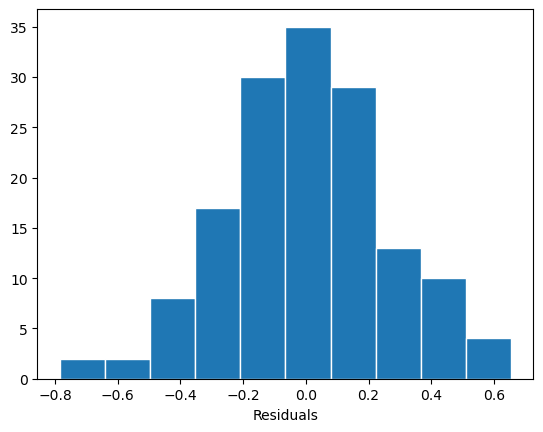

In [27]:
plt.hist(model.resid,edgecolor='w')
plt.xlabel('Residuals')
plt.show()

**ACCEPTABLE DVs VALUES FOR MAKING PREDICTIONS WITH THE MODEL**

In [41]:
X.agg(['min','max','mean','std','median']).T

,min,max,mean,std,median
sepal_length,4.3,7.9,5.843333,0.828066,5.8
sepal_width,2.0,4.4,3.057333,0.435866,3.0
petal_width,0.1,2.5,1.199333,0.762238,1.3
species_setosa,0.0,1.0,0.333333,0.472983,0.0
species_versicolor,0.0,1.0,0.333333,0.472984,0.0


# ASSIGNMENT

In [59]:
df1 = pd.read_csv('delivery cost.csv')
df1.head()

,Cost,Prep,Delivery,Distance
0,32.60,10,51,20
1,23.37,11,33,12
2,31.49,6,47,19
3,19.31,9,18,8
4,28.35,8,88,17


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cost      20 non-null     float64
 1   Prep      20 non-null     int64  
 2   Delivery  20 non-null     int64  
 3   Distance  20 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 768.0 bytes


In [71]:
X1 = df1.drop('Cost',axis=1)
y = df1.Cost

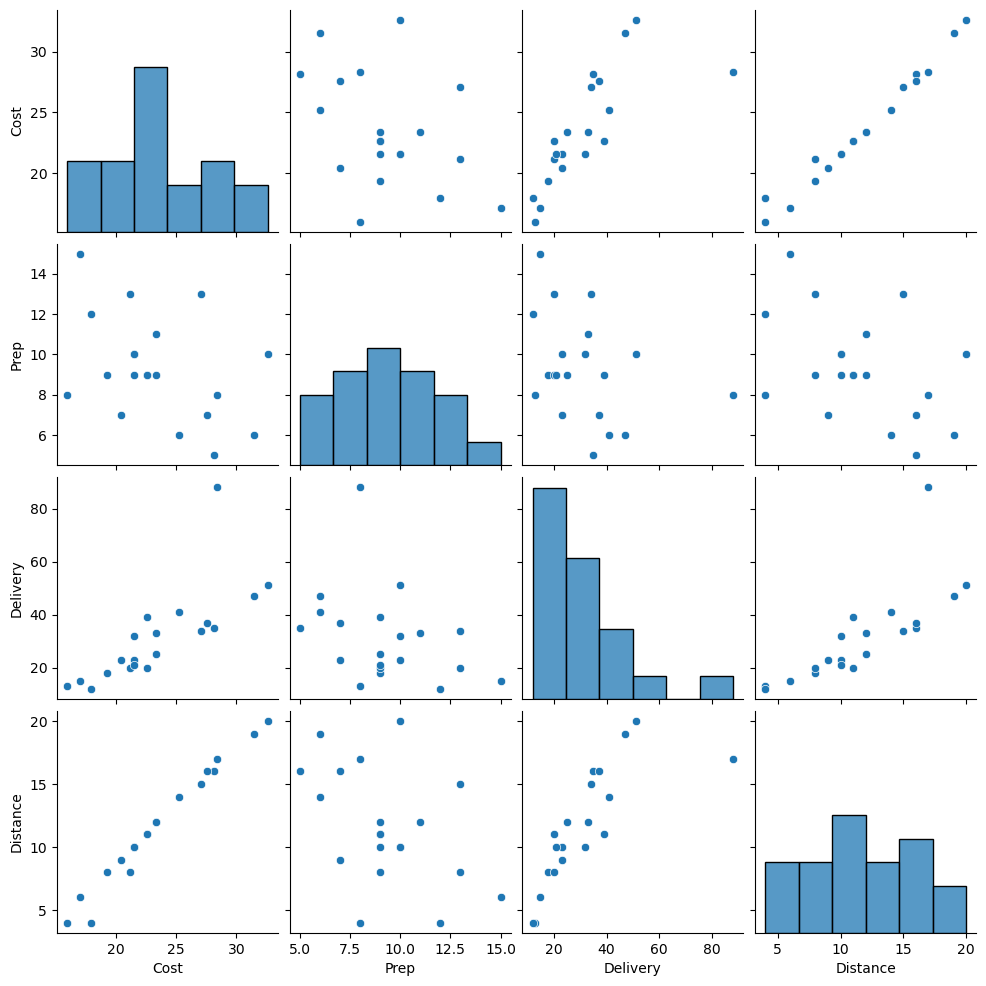

In [72]:
sns.pairplot(df1)
plt.show()

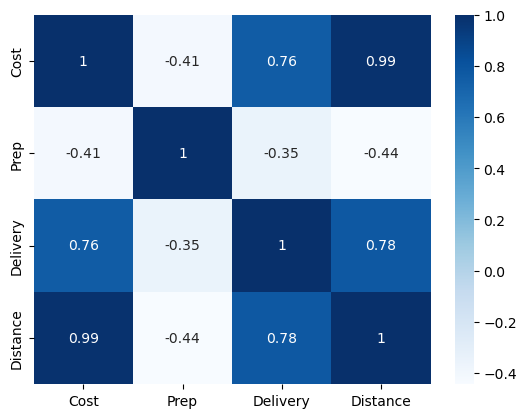

In [73]:
sns.heatmap(df1.corr(),cmap='Blues',annot=True)
plt.show()

In [74]:
model1 = sm.OLS(endog=y, exog=sm.add_constant(X1)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           3.02e-13
Time:                        12:38:11   Log-Likelihood:                -20.749
No. Observations:                  20   AIC:                             49.50
Df Residuals:                      16   BIC:                             53.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2424      1.041     10.803      0.000       9.036      13.448
Prep           0.0608      0.076      0.802      0.435      -0.100       0.222
Delivery      -0.0085      0.016     -0.533      0.601      -0.043       0.025
Distance       1.0266      0.064     16.148      0.000       0.892       1.161
==============================================================================
Omnibus:                        9.579   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.893
Skew:                           1.248   Prob(JB):                       0.0319
Kurtosis:                       4.429   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
df1.describe()

,Cost,Prep,Delivery,Distance
count,20.000000,20.000000,20.000000,20.000000
mean,23.448500,9.300000,31.350000,11.600000
std,4.575237,2.577228,17.394116,4.581427
min,15.990000,5.000000,12.000000,4.000000
25%,20.975000,7.750000,20.000000,8.750000
50%,22.630000,9.000000,28.500000,11.000000
75%,27.182500,10.250000,37.500000,15.250000
max,32.600000,15.000000,88.000000,20.000000


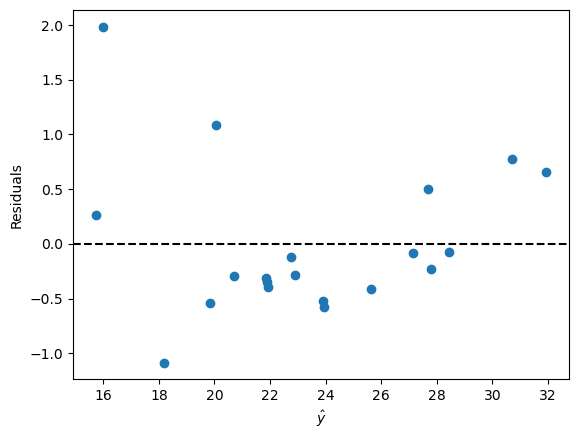

In [100]:
plt.scatter(model1.predict(),model1.resid)
plt.axhline(0,c='k',ls='--')
plt.xlabel('$\\hat{y}$')
plt.ylabel('Residuals')
plt.show()

In [118]:
np.mean(model1.resid)

1.0036416142611416e-14

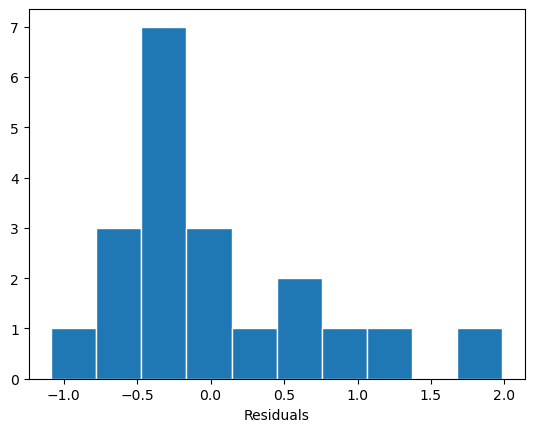

In [121]:
plt.hist(model1.resid,edgecolor='w')
plt.xlabel('Residuals')
plt.show()

<AxesSubplot: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

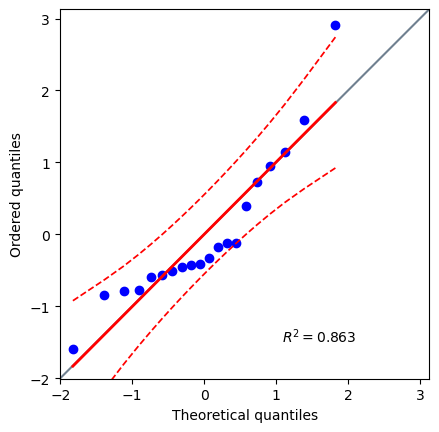

In [123]:
pg.qqplot(model1.resid)

**TESTING TO SEE IF TRANSFORMATIONS WOULD HELP**

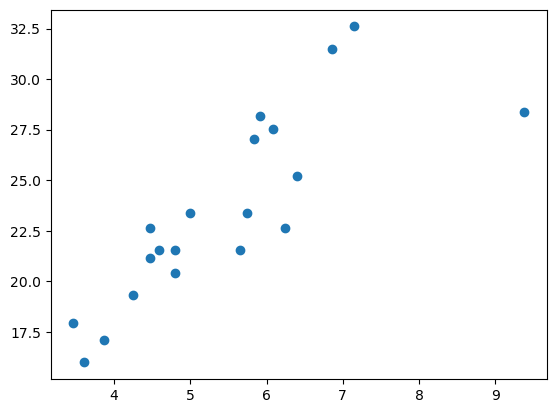

In [88]:
plt.scatter(df1.Delivery**0.5,y)

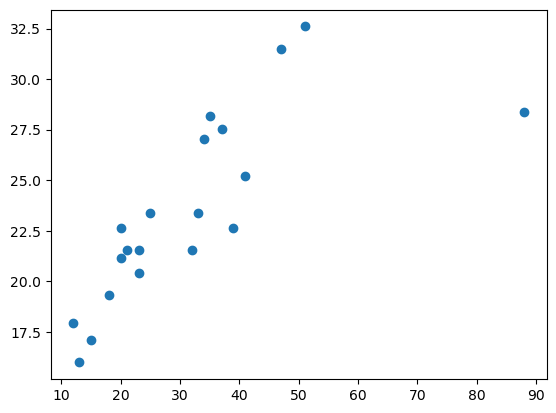

In [87]:
plt.scatter(df1.Delivery,y)

(array([4., 6., 3., 4., 1., 1., 0., 0., 0., 1.]),
 array([12. , 19.6, 27.2, 34.8, 42.4, 50. , 57.6, 65.2, 72.8, 80.4, 88. ]),
 <BarContainer object of 10 artists>)

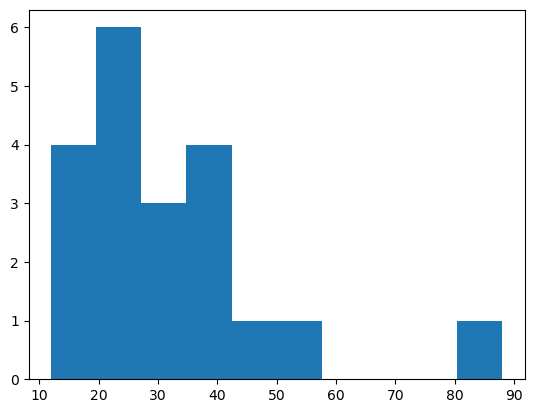

In [89]:
plt.hist(df1.Delivery)

(array([2., 1., 4., 3., 1., 5., 2., 1., 0., 1.]),
 array([2.48490665, 2.68414967, 2.88339268, 3.0826357 , 3.28187872,
        3.48112173, 3.68036475, 3.87960777, 4.07885078, 4.2780938 ,
        4.47733681]),
 <BarContainer object of 10 artists>)

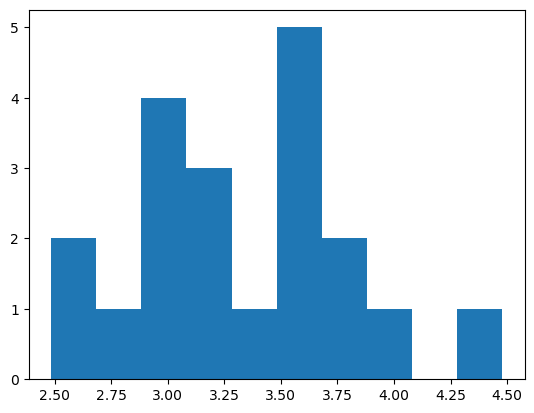

In [91]:
plt.hist(np.log(df1.Delivery))

In [92]:
df2 = df1.copy()
df2.Delivery = np.log(df2.Delivery)

In [93]:
model2 = sm.OLS(endog=y,exog=sm.add_constant(df2.drop('Cost',axis=1))).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Cost   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     239.6
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.67e-13
Time:                        13:06:44   Log-Likelihood:                -20.010
No. Observations:                  20   AIC:                             48.02
Df Residuals:                      16   BIC:                             52.00
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3455      1.959      6.813      0.000       9.193      17.498
Prep           0.0571      0.073      0.780      0.447      -0.098       0.212
Delivery      -0.9226      0.745     -1.238      0.234      -2.503       0.657
Distance       1.0895      0.082     13.262      0.000       0.915       1.264
==============================================================================
Omnibus:                        7.817   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                5.159
Skew:                           1.069   Prob(JB):                       0.0758
Kurtosis:                       4.273   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
np.sqrt(np.sum(model2.resid**2))

2.943066913247169

In [97]:
np.sqrt(np.sum(model1.resid**2))

3.0537573090034953

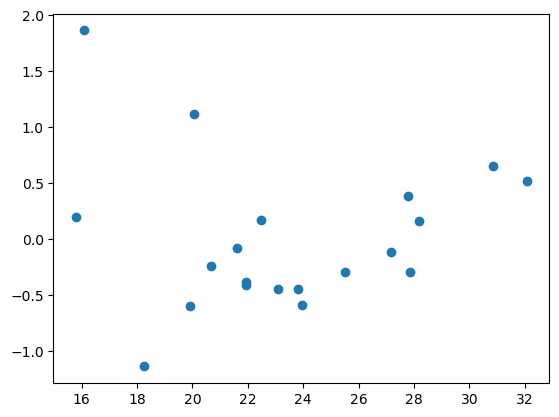

In [101]:
plt.scatter(model2.predict(),model2.resid)

<AxesSubplot: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

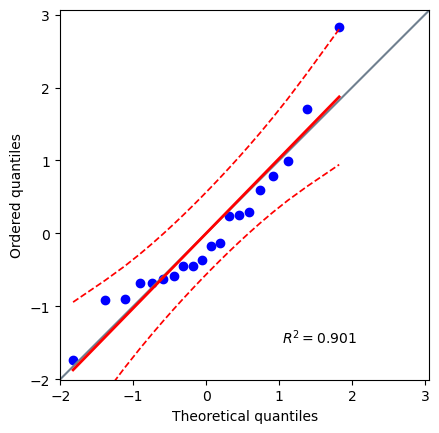

In [124]:
pg.qqplot(model2.resid)

(array([1., 2., 6., 3., 3., 3., 0., 1., 0., 1.]),
 array([-1.14022398, -0.83978762, -0.53935125, -0.23891489,  0.06152148,
         0.36195784,  0.6623942 ,  0.96283057,  1.26326693,  1.56370329,
         1.86413966]),
 <BarContainer object of 10 artists>)

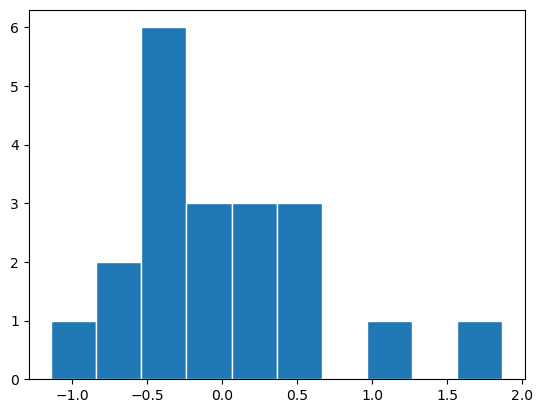

In [125]:
plt.hist(model2.resid,edgecolor='w')